In [1]:
import fNeuro.second_level.second_level_functions as slf
import ptitprince as pt
import nilearn.plotting as plotting
import os
from decouple import config
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import numpy as np

In [2]:
threshold_pval = -np.log10(0.05)
eft_path = os.path.join(config('eft'), '2ndlevel', 'mixed_model')
happy_path = os.path.join(config('happy'), '2ndlevel', 'mixed_model')
fear_path = os.path.join(config('fear'), '2ndlevel', 'mixed_model')
eft_images = slf.get_images(eft_path)
happy_images = slf.get_images(happy_path)
fear_images = slf.get_images(fear_path)
eft_contrasts = slf.contrast_imgs(eft_images['t_stat'], eft_images['pvals'])
happy_contrasts = slf.contrast_imgs(happy_images['t_stat'], happy_images['pvals'])
fear_contrasts = slf.contrast_imgs(fear_images['t_stat'], fear_images['pvals'])

In [3]:
sig_clusters = ['eft_interaction', 'happy_interaction', 'fear_time']
parameter_estimates = {}
for task_contrast in sig_clusters:
    print('working on task and contrast: ', task_contrast)
    task = task_contrast.split('_')[0]
    contrast = task_contrast.split('_')[1]
    base_dir = config(task)
    path = os.path.join(base_dir, '2ndlevel')
    copes_dir = os.path.join(base_dir, '2ndlevel', 'mixed_model')
    parameter_estimates_df = slf.get_peak_voxel(base_dir, path, copes_dir, contrast)
    parameter_estimates[task_contrast] = parameter_estimates_df

working on task and contrast:  eft_interaction
working on task and contrast:  happy_interaction
working on task and contrast:  fear_time


## Happy interaction plot

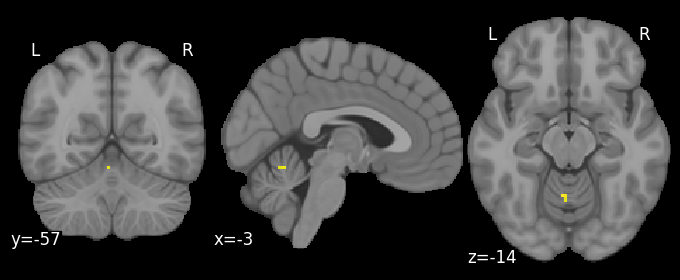

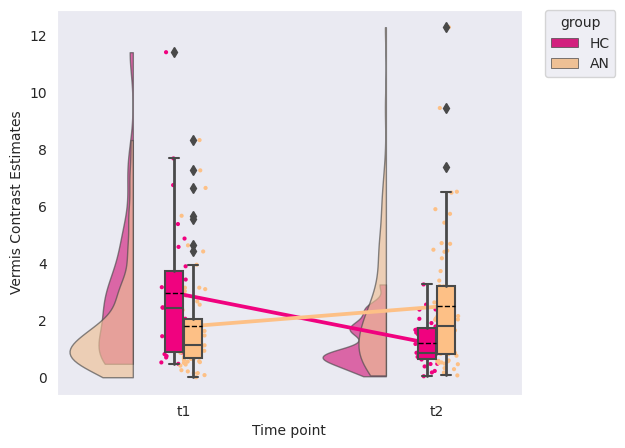

In [89]:
plotting.plot_stat_map(
    happy_contrasts['interaction']['pvals'],
    threshold=threshold_pval,
    colorbar=False,
    draw_cross=False,
    cmap='viridis',
    black_bg=True

)
plt.show()
fig,ax = plt.subplots(1, 1, figsize=(6, 5))
plot = pt.RainCloud(
            x="time_point", 
            y='Vermis_4_5', 
            hue="group", 
            data=parameter_estimates['happy_interaction'], 
            palette='Accent_r', 
            #ax=ax[1],
            pointplot=True,
            width_viol=.5,
            jitter=0.1,
            bw=.3,
            alpha=.65, 
            dodge=True,
            orient='v',
            box_meanprops={"zorder" : 11, "color":"black"}, 
            box_meanline=True, 
            box_showmeans=True, 
            box_medianprops={"zorder": 11},
            
)
           

ax.set_ylabel('Vermis Contrast Estimates')
ax.set_xlabel('Time point')
plt.show()

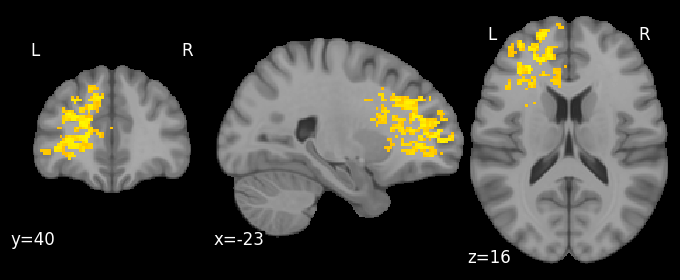

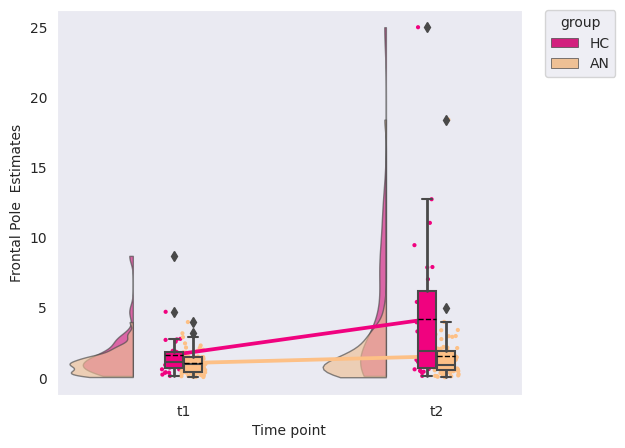

In [94]:
plotting.plot_stat_map(
    fear_contrasts['time']['pvals'],
    threshold=threshold_pval,
    colorbar=False,
    draw_cross=False,
    cmap='autumn',
    black_bg=True

)
plt.show()
fig,ax = plt.subplots(1, 1, figsize=(6, 5))
plot = pt.RainCloud(
            x="time_point", 
            y='Frontal_Sup_2_L', 
            hue="group", 
            data=parameter_estimates['fear_time'], 
            palette='Accent_r', 
            pointplot=True,
            width_viol=.5,
            jitter=0.1,
            bw=.3,
            alpha=.65, 
            dodge=True,
            orient='v',
            box_meanprops={"zorder" : 11, "color":"black"}, 
            box_meanline=True, 
            box_showmeans=True, 
            box_medianprops={"zorder": 11},
            
)
           

ax.set_ylabel('Frontal Pole  Estimates')
ax.set_xlabel('Time point')
plt.show()

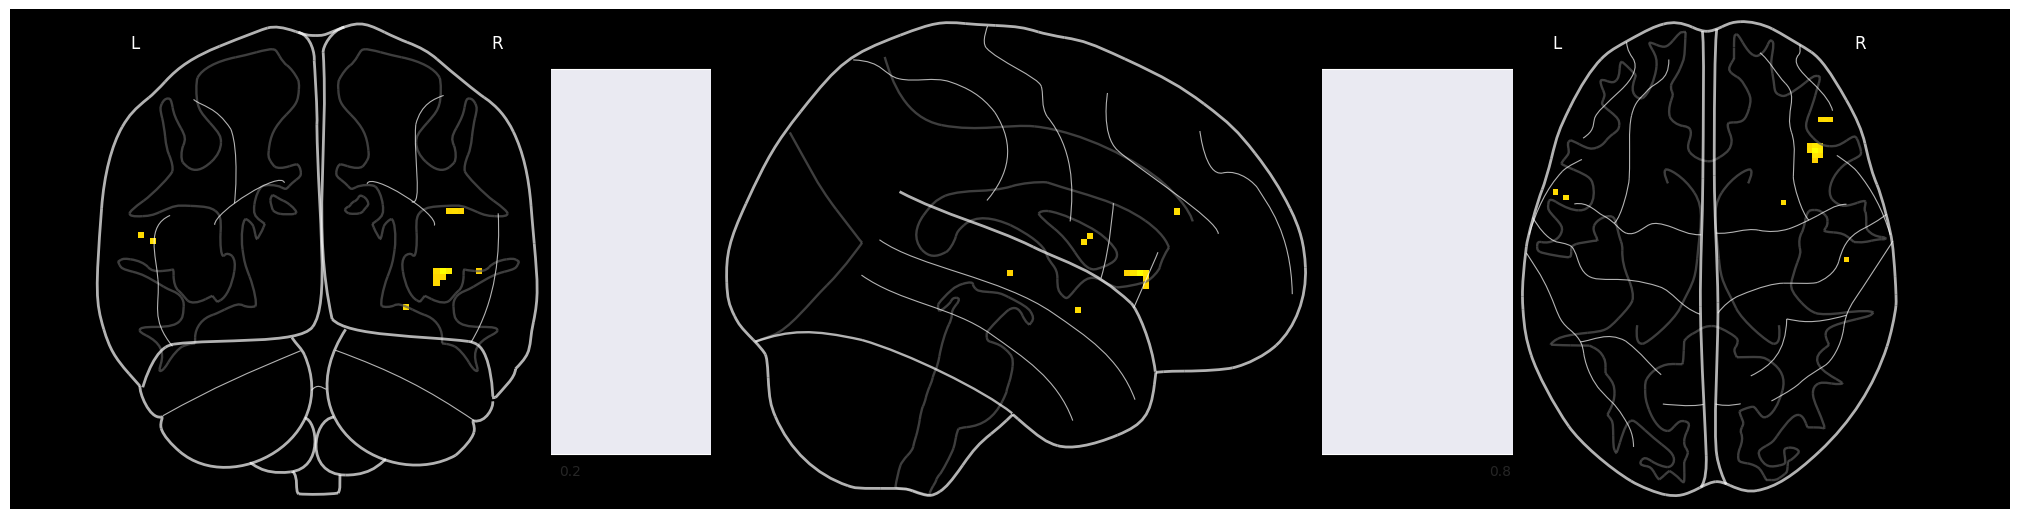

In [111]:
fig,ax = plt.subplots(1, 1, figsize=(20, 5))
plotting.plot_glass_brain(
    eft_contrasts['interaction']['pvals'],
    threshold=threshold_pval,
    colorbar=False,
    draw_cross=False,
    cmap='autumn',
    black_bg=True,
    figure=fig
)